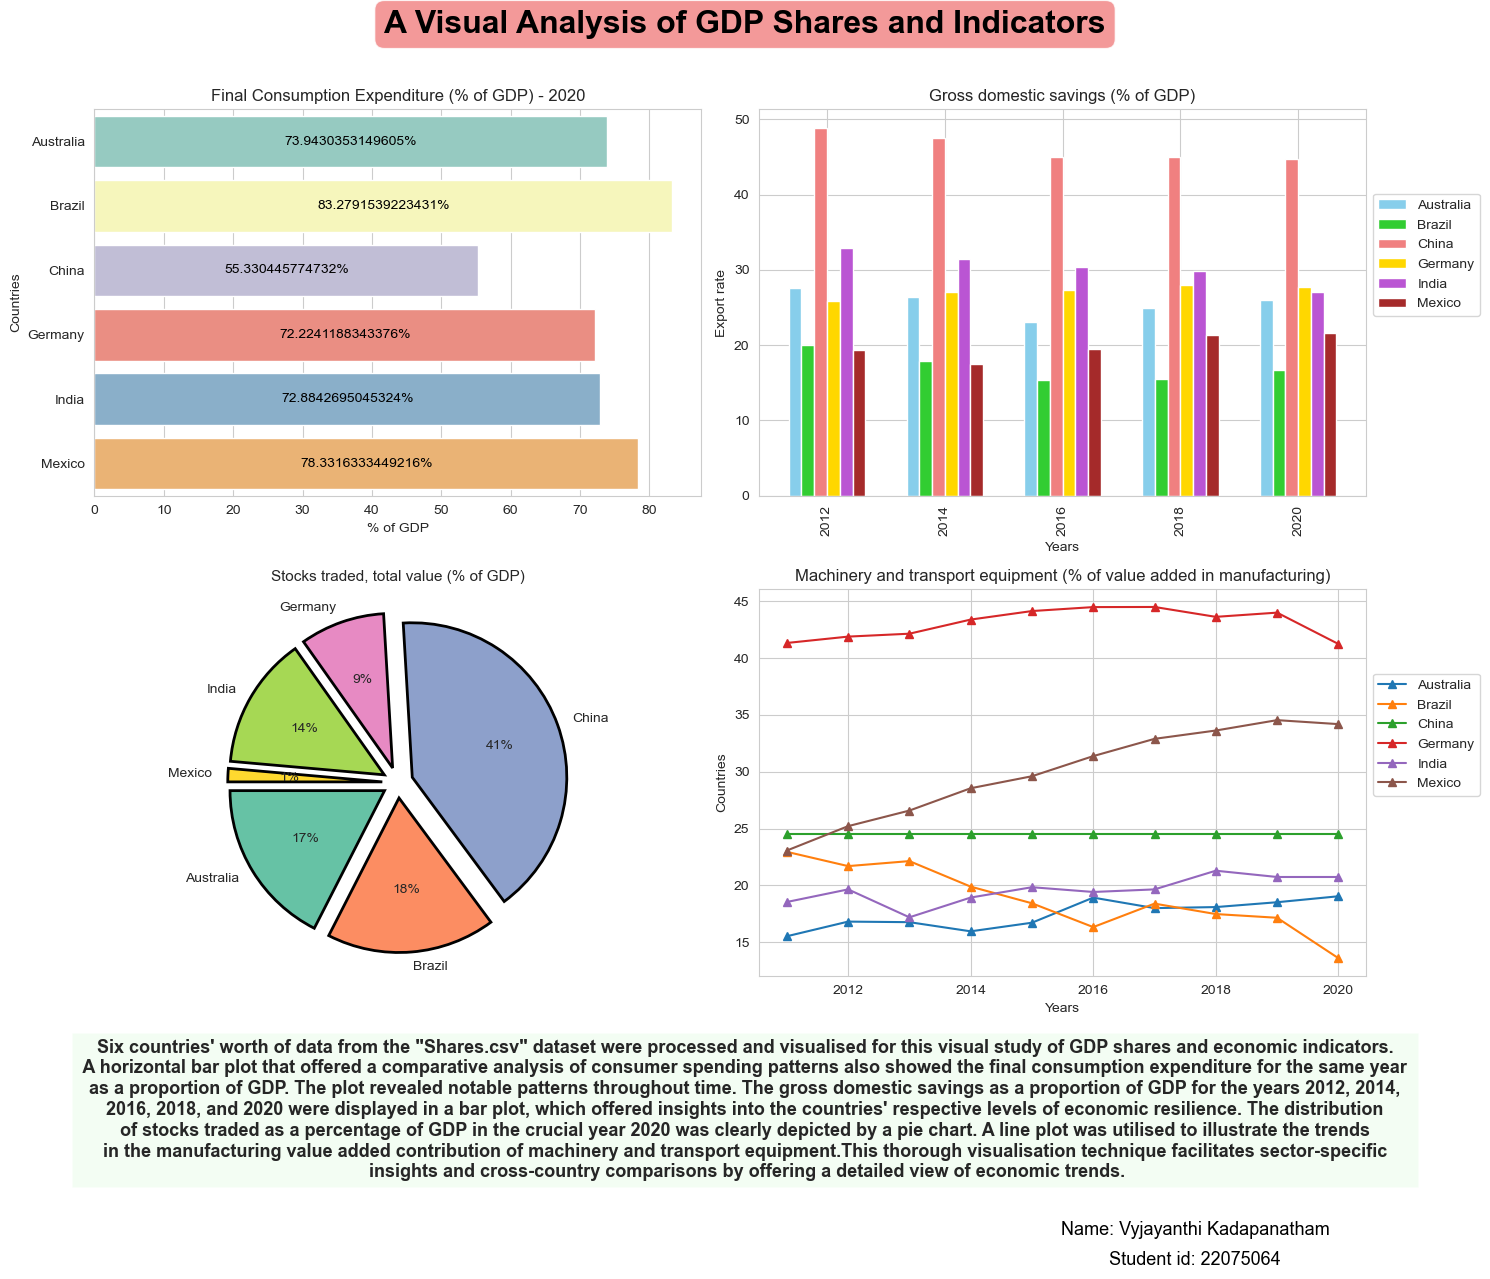

In [55]:
import matplotlib.pyplot as plt #Inputing file, Data-processing
import pandas as pd #creating visualizations
import seaborn as sns #statistical data visualization

def process_data(df, indicator_name, countries):
    # Filter the dataframe based on indicator name and countries
    data = df[(df["Series Name"] == indicator_name) 
                                  & (df["Country Name"].isin(countries))]
    
    # Rename columns for readability
    data_rename = data.rename(columns={'2011 [YR2011]': '2011',
                            '2012 [YR2012]': '2012', '2013 [YR2013]': '2013',
                            '2014 [YR2014]': '2014', '2015 [YR2015]': '2015',
                            '2016 [YR2016]': '2016', '2017 [YR2017]': '2017',
                            '2018 [YR2018]': '2018', '2019 [YR2019]': '2019',
                            '2020 [YR2020]': '2020', '2021 [YR2021]': '2021'})
    
    # Drop unnecessary columns
    data_drop = data_rename.drop(['Country Code', 'Series Code', 'Series Name',
                                      '2021'], axis=1).reset_index(drop=True)

    # Transpose the dataframe.
    data_t = data_drop.transpose()
    data_t.columns = data_t.iloc[0]
    data_t = data_t.iloc[1:]

    # Set index to numeric and add a 'Years' column.
    data_t.index = pd.to_numeric(data_t.index)
    data_t['Years'] = data_t.index
    data_t.reset_index(drop=True, inplace=True)

    # Return processed DataFrame with unnecessary columns dropped.
    return data_drop, data_t

def lineplot(ax, line_plot_data, title):
    '''Define a function named 'lineplot' to create a line plot 
    using specified data and title.'''
    
    line_plot_data.plot(ax=ax, x='Years', y=['Australia', 'Brazil', 'China', 
                        'Germany', 'India', 'Mexico'], kind='line', marker='^')
    
    # Set title and labels
    ax.set_title(title)
    ax.set_xlabel('Years')
    ax.set_ylabel('Countries')
    
    # Position the legend outside the plot to the right for optimal placement.
    ax.legend(loc='best', bbox_to_anchor=(1, 0.8))

def barplot(ax, df, x_value, y_values, head_title, x_label, y_label, colors):
    '''Defining the function to create the barplot using specified DataFrame 
    and customization parameters.'''
    
    # Set Seaborn style to 'whitegrid' for white background with grid lines.
    sns.set_style('whitegrid')
    
    # Filter DataFrame rows to include only data for the specified years.
    df_filtered = df[df['Years'].isin([2012, 2014, 2016, 2018, 2020])]
    
    # Plot bar chart with filtered data on specified axes using given parameters.
    df_filtered.plot(ax=ax, x=x_value, y=y_values, kind='bar', title=head_title,
                                         color=colors, width=0.65, legend=True)
    
    # Set title and labels.
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    # Position the legend outside the plot to the right for optimal placement.
    ax.legend(loc='best', bbox_to_anchor=(1, 0.8))

def pieplot(ax, df, year, autopct='%1.0f%%', fontsize=11):
    '''Define a function named 'pieplot' to create a pie chart representing 
    population distribution for specific countries in a given year.'''
    
    # Explode parameter to create a slight separation for each pie slice.
    explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
    
    # Define labels for each country in the pie chart.
    labels = ['Australia', 'Brazil', 'China', 'Germany', 'India', 'Mexico']
    
    # Define a color palette for the pie chart.
    colors = sns.color_palette('Set2')
    
    # Plot a pie chart on the specified axes with provided parameters.
    df.plot.pie(ax=ax, y=str(year), autopct=autopct, labels=labels, explode=explode,
                startangle=180, wedgeprops={"edgecolor": "black", 
                "linewidth": 2, "antialiased": True}, colors=colors, legend=False)

    # Set title and labels.
    ax.set_ylabel("")
    ax.set_title('Stocks traded, total value (% of GDP)', fontsize=fontsize)

def horizontalbarplot(ax, data_t, countries, year):
    '''Defining the function to create the horizontal barplot using specified 
    DataFrame and customization parameters.'''
    
    # Reshape the DataFrame using melt for better visualization.
    melted_data = pd.melt(data_t, id_vars='Years', value_vars=countries,
                          var_name='Country', value_name='Export Rate')

    # Convert 'Years' to integers for numeric comparison.
    melted_data['Years'] = melted_data['Years'].astype(int)
    
    # Extract data for the specified year.
    melted_data_year = melted_data[melted_data['Years'] == year]
    
    # Plot a horizontal bar chart using seaborn.
    sns.barplot(ax=ax, data=melted_data_year, x='Export Rate', y='Country', 
                                                                palette='Set3')
    
    # Set axis labels and title for better interpretation.
    ax.set_xlabel('% of GDP')
    ax.set_ylabel('Countries')
    ax.set_title(f'Final Consumption Expenditure (% of GDP) - {year}')
    
    # Add value annotations inside the bars for clarity.
    for i, value in enumerate(melted_data_year['Export Rate']):
        ax.text(value / 2, i, f'{value}%', ha='center', va='center', 
                                                    fontsize=10, color='black')

# Read the CSV file.
df = pd.read_csv('Shares.csv')

# List of countries to be analyzed and visualized in the data.
countries = ['Australia', 'Brazil', 'China', 'Germany', 'India', 'Mexico']

# Extract and process data for key economic indicators across specified countries.
exp, exp_t = process_data(df, 'Final consumption expenditure (% of GDP)', countries)
gross, gross_t = process_data(df, 'Gross domestic savings (% of GDP)', countries)
stocks, stocks_t = process_data(df, 'Stocks traded, total value (% of GDP)', countries)
machi, machi_t = process_data(df, 
    'Machinery and transport equipment (% of value added in manufacturing)', 
                                                                    countries)

# Create a 2x2 grid of subplots with a specified figure size.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Visualising the lineplot.
lineplot(axes[1, 1], machi_t, "Machinery and transport equipment (% of value added in manufacturing)")

# Visualising the barplot.
barplot(axes[0, 1], gross_t, 'Years', ['Australia', 'Brazil', 'China', 
                                               'Germany', 'India', 'Mexico'],
                'Gross domestic savings (% of GDP)', 'Years', 'Export rate', 
        ('skyblue', 'limegreen', 'lightcoral','gold', 'mediumorchid', 'brown'))

# Visualising the pieplot.
pieplot(axes[1, 0], stocks, '2020')

# Visualising the horizontal barplot.
horizontalbarplot(axes[0, 0], exp_t, countries, year=2020)

# Set the figure's super title with specific styling and positioning.
fig.suptitle("A Visual Analysis of GDP Shares and Indicators", fontsize=23, 
                     fontweight='bold', color='black',ha='center', va='top', 
                                 x=0.5, y=1.02, bbox=dict(boxstyle='round', 
                                            facecolor='lightcoral', alpha=0.8))

# Add report text for all subplots at the end
report_text = (
"""Six countries' worth of data from the "Shares.csv" dataset were processed and visualised for this visual study of GDP shares and economic indicators.
 A horizontal bar plot that offered a comparative analysis of consumer spending patterns also showed the final consumption expenditure for the same year 
 as a proportion of GDP. The plot revealed notable patterns throughout time. The gross domestic savings as a proportion of GDP for the years 2012, 2014, 
 2016, 2018, and 2020 were displayed in a bar plot, which offered insights into the countries' respective levels of economic resilience. The distribution 
 of stocks traded as a percentage of GDP in the crucial year 2020 was clearly depicted by a pie chart. A line plot was utilised to illustrate the trends 
 in the manufacturing value added contribution of machinery and transport equipment.This thorough visualisation technique facilitates sector-specific 
 insights and cross-country comparisons by offering a detailed view of economic trends."""
)

Name = 'Vyjayanthi Kadapanatham'
Student_id = '22075064'

# Adjust layout and save the figure
fig.text(0.5, -0.08, report_text, ha='center', va='center', fontsize=13, 
         fontweight='bold', bbox=dict(facecolor='lightgreen', alpha=0.10))
fig.text(0.8, -0.2, 'Name: {}'.format(Name), ha='center', va='center', 
                                         fontsize=13, color='black')
fig.text(0.8, -0.23, 'Student id: {}'.format(Student_id), ha='center', 
                                     va='center', fontsize=13, color='black')

# Adjust layout for better spacing between subplots.
plt.tight_layout()

# Show the plot
plt.show()

